# Edge Detection

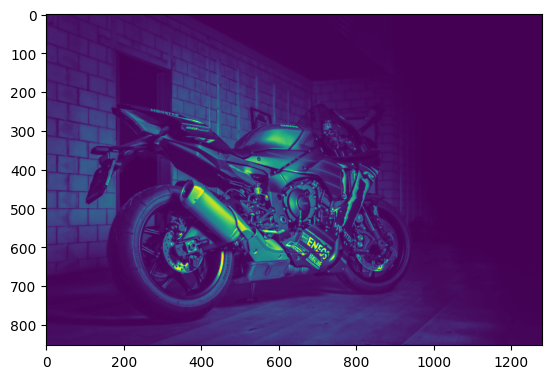

In [15]:
from skimage import io 
from matplotlib import pyplot as plt

img = io.imread("images/R1.jpg", as_gray = True)
from skimage.transform import rescale, resize, downscale_local_mean

rescaled_img = rescale(img, 1.0/4.0, anti_aliasing=True)
resized_img = resize(img, (200,200))
downscaled_img = downscale_local_mean(img, (4,3))
plt.imshow(rescaled_img)

# Edge Filteration

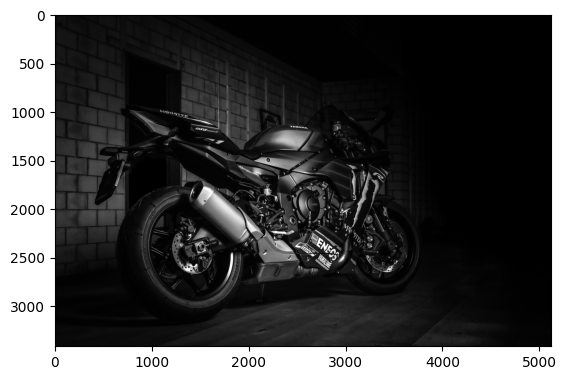

In [16]:
from skimage.filters import roberts, sobel, scharr, prewitt

edge_roberts = roberts(img)
edge_sobal = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)

plt.imshow(img, cmap='gray')

# Edge Detection

In [20]:
from skimage import restoration
import numpy as np 
psf = np.ones((3,3))/9

deconvolved, _ = restoration.unsupervised_wiener(img,psf)
plt.imsave("images/deconvolved_R1.jpg", deconvolved, cmap='gray')

# Filters and Thresholds

(3415, 5120)


/Users/sambhav/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py:3553: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


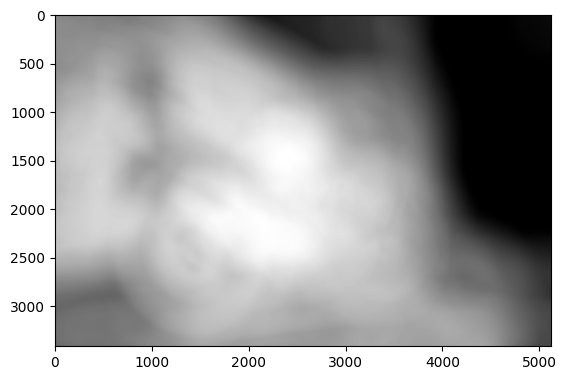

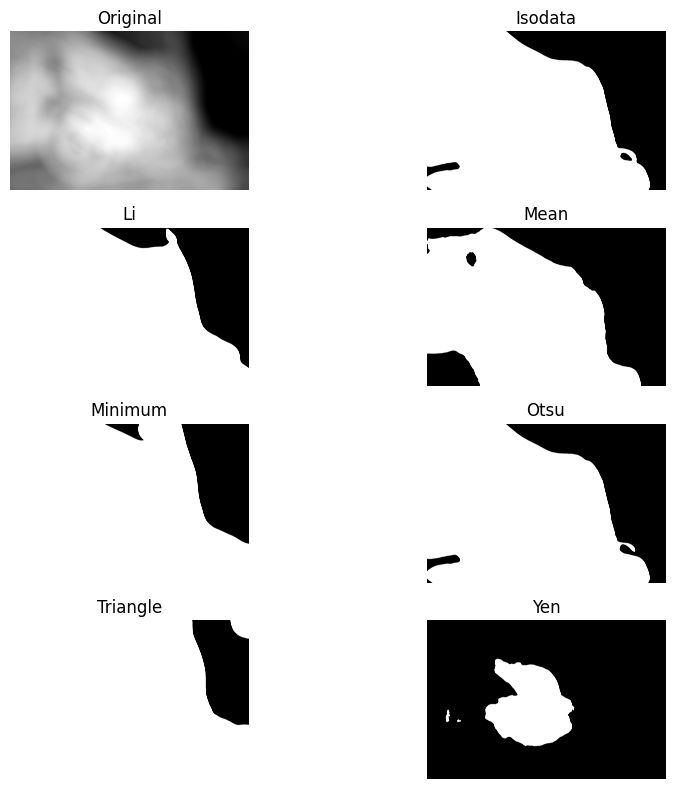

In [12]:
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import try_all_threshold

# Load the image in grayscale
img = io.imread("images/R1.jpg", as_gray=True)
print(img.shape)

# Choose an appropriate neighborhood size based on the image dimensions
neighborhood_size = min(img.shape) // 10  # Adjust the factor as needed
entropy_img = entropy(img, disk(neighborhood_size))
plt.imshow(entropy_img, cmap='gray')

fig, ax = try_all_threshold(entropy_img, figsize=(10, 8), verbose=True)
plt.show()
